# Imports and tools

In [ ]:
#for colab

In [1]:
# for local machine
from sympy import im
from src.models import Encoder, Projector
from src.augmentations import test_transform, train_transform
from src.vicreg_objectives import vicreg_loss_detailed, vicreg_loss_performance
from src.data_load import (
    load_cifar10,
    load_mnist,
    load_combined_test_set,
    load_vicreg_cifar10,
    test
)

In [2]:
test()

 43%|████▎     | 73203712/170498071 [00:45<00:18, 5246687.96it/s]

# Q1: Training
Train VICReg on the CIFAR10 dataset. Plot the values of each of the 3 objectives (in separate
figures) as a function of the training batches. In your figures also include the loss terms values on the test set,computed once every epoch.

# Q2: PCA vs. T-SNE Visualizations.
Compute the representations of each test image using your trained encoder.
Map (using the sklearn library) the representation to a 2D space using: (i) PCA (ii) T-SNE. Plot the T-SNE and the PCA 2D representations, colored by their classes. Look at both visualizations (PCA vs. T-SNE), which one seems more effective for visualizations to you? Look at the T-SNE visualization. Did VICReg managed to capture the class information accurately? Which classes seem entangled to you? Explain.


# Q3: Linear Probing.
Perform a linear probing (single FC layer) to the encoder’s representation. Train this
classifier on the representations of the CIFAR10 train set. Remember to freeze the encoder, i.e. do not update it. Compute the probing’s accuracy on the test set. What is the accuracy you reach with your classifier?
Note: classifier accuracy should be at least 60% on the test set.

# Q4: Ablation 1 - No Variance Term.
Modify the optimized objective, by removing the variance objective term
(µ = 0.). Using the representations from the modified encoder, perform the same PCA visualization from Q2, and the linear probing from Q3 (and include them in your report). Is the new accuracy better or worse? Can you see anything different in the representations visualization? Try to explain the difference in the accuracy using the visualizations.


# Q5: Ablation 2 - No Generated Neighbors.
Now, we would like to ablate VICReg by only removing the generated neighbors, using neighbors from the data itself: 
First, compute the representations of your original VICReg, on all of the training set. In each step of training and for each image in the batch, use these representations to find the top 3 nearest neighbors, and randomly select 1 of them. Use the original image and this neighbor of it as your 2 views for the VICReg algorithm. 

2 Practical Tips: (i) We find that training this algorithm for only a single epoch is more
beneficial. (ii) We recommend you to compute the neighboring indices of each image in advance, and delete the original VICReg model from your (GPU) memory. This will save both run time and GPU space.
Compute the linear probing accuracy, and report it. Is the accuracy different from the original linear probing from 3?
- If no, explain why do you think this change had no effect (what compensates the things that are missing?).
- If yes, explain what added value do you think the generated neighbors adds to the algorithm.

# Q6: Ablation 3 - Laplacian Eigenmaps.
After removing the generated neighbors, we would like to remove both it and the amortization at once. To do so, we will perform Laplacian Eigenmaps representation learning on the training data of CIFAR10. Since this algorithm is difficult to run, we ran it for you on 10K images (due to runtime limitations) and give you the T-SNE plotting of these representations in Fig. 2 3. 
Compare this to VICReg’s T-SNE plot from Q2. Based on this visual and linear probing comparison, which method (VICReg vs. Laplacian Eigenmaps) seems more effective for downstream object classification? 
Explain your answer in detail, including what do you think makes one algorithm to be more successful.
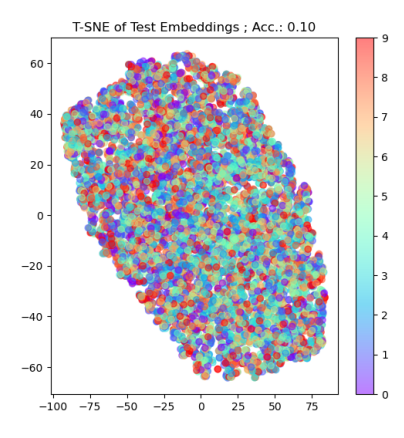


# Q7: Retrieval Evaluation
Now that we slowly “pealed” VICReg back to the laplacian eigenmaps algorithm,
we wish to evaluate it qualitatively. For the methods Q1 (VICReg) and Q5 (No Generated Neighbors) perform a
qualitative retrieval evaluation. That means:
- Select 10 random images from the training set, one from each class.
- For each selected image, use the representations of each of the evaluated methods, to find its 5 nearest neighbors
in the dataset.
- Plot the images together with their neighbors.
- Using the same images, perform the same visualization for the 5 most distant images in the dataset.

Using this visualization, explain what attributes each method attends to. What are the differences you see between
the different methods? Which one excels at keeping close images together? Which one excels at keeping distant
images far apart? Explain the differences between the methods in detail, as seen by this visualization. You may
select more than 1 image for a specific class if you wish to get a better understanding (Although it is not mandatory).

# Q1 - Anomaly Detection.
Using the CIFAR10 training data as reference for normal data, compute the kNN
density estimation for all the (CIFAR10 + MNIST) test set representations. Do this for both (i) VICReg (ii) VICReg
without generated neighbors. Use k = 2.


# Q2 - ROC AUC Evaluation
Plot the ROC Curve of both methods. Use the sklearn library for creating these
figures. In the title / legend incorporate the AUC of each method. Which method is ’better’? In a sentence or two,
explain why do you think its better.

# Q3 - Qualitative Evaluation - Ambiguity of Anomaly Detection.
Plot the 7 most anomalous samples according
to VICReg and VICReg without the generated neighbors, in two separate rows (you can split to different plots if
more convenient). Look at the results. Explain what aspects each method found to be anomalous. Keeping in mind
we did not give either of the methods any clues regarding which anomalies are we looking for, do you still think one
is better than the other? Explain your answer.

# Q1 - Clustering using K-Means
Use the implementation of sklearn to cluster the CIFAR10 training set to
10 clusters. Do this using the representations of VICReg once, and a second time for VICReg without generated
neighbors.

# Q2 - Visualizing the Clusters in 2D
Perform a dimensionality reduction to 2 dimensions using T-SNE, for
the representations of both methods (separately). For each method, plot the reduced embeddings in a 2D space twice
(side by side): (i) First, colored by their cluster index (according to the matching clustering from Q1). (ii) Second,
colored by their actual class index. In each figure, also plot the clusters centers in black color.
Look at the results, which method looks more successful at finding clusters? Which method looks more successful
at separating between the classes? Explain your answer, keeping in mind that similarly to Anomaly Detection there
are no clues for which clusters to look for.

# Q3 - Quantitative Analysis
Use the Silhouette Score on the clusterings of both methods (in their original embedding dimensions). Report the 2 different scores. Is this coherent with what you see in your visual analysis? Explain your answer